In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
if '..' not in sys.path: sys.path.append('..')
from f_ring_util import (compute_corrected_ew,
                         hg_func)

In [137]:
def powspace(start, stop, power, num):
    start = np.power(start, 1/float(power))
    stop = np.power(stop, 1/float(power))
    return np.power(np.linspace(start, stop, num=num), power)

def logpowspace(start, stop, power, num):
    start = np.power(np.log(start), 1/float(power))
    stop = np.power(np.log(stop), 1/float(power))
    return np.exp(np.power(np.linspace(start, stop, num=num), power))

Text(0.5, 1.0, 'H-G Function with Various Parameters')

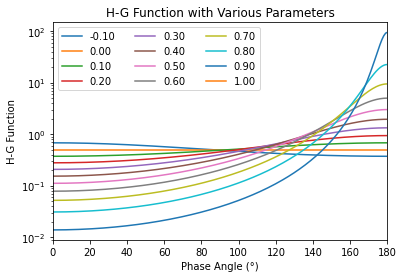

In [138]:
xrange = np.linspace(0., 180., 180)
for g in np.arange(-0.1, 1.01, 0.1):
    hg = hg_func((g, 1), xrange)
    plt.plot(xrange, hg, label=f'{g:.2f}')
plt.legend(ncol=3)
plt.xlim(0,180)
plt.yscale('log')
plt.xlabel('Phase Angle (°)')
plt.ylabel('H-G Function')
plt.title('H-G Function with Various Parameters')

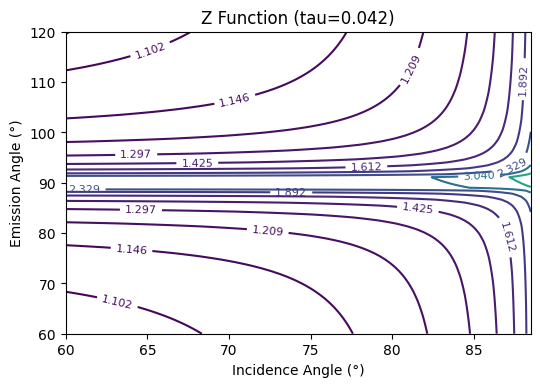

In [226]:
tau = 0.042
dim_size = 100
em = np.concatenate((np.linspace(60, 89, dim_size//2), np.linspace(91.1, 120, dim_size//2)))
inc = np.linspace(60, 88.5, dim_size)
mg = np.meshgrid(em, inc)
z = compute_corrected_ew(1., np.repeat(em, dim_size), np.tile(inc, dim_size), tau).reshape((dim_size, dim_size))
z[np.isinf(z)] = 1
levels = sorted(logpowspace(np.min(z), np.max(z), 10, 40))
fig = plt.figure(figsize=(6,4), dpi=100)
ct = plt.contour(inc, em, z, levels)
plt.clabel(ct, inline=1, fontsize=8)
plt.xlabel('Incidence Angle (°)')
plt.ylabel('Emission Angle (°)')
_=plt.title(f'Z Function (tau={tau:.3f})')

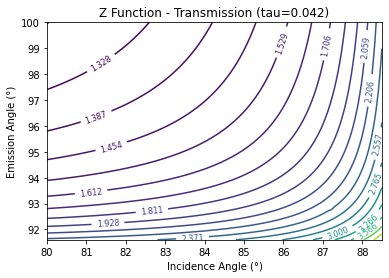

In [145]:
em = np.linspace(91.6, 100, dim_size)
inc = np.linspace(80, 88.5, dim_size)
mg = np.meshgrid(em, inc)
z = compute_corrected_ew(1., np.repeat(em, dim_size), np.tile(inc, dim_size), tau).reshape((dim_size, dim_size))
levels = logpowspace(np.min(z), np.max(z), 2, 20)
ct = plt.contour(inc, em, z, levels)
plt.clabel(ct, inline=1, fontsize=8)
plt.xlabel('Incidence Angle (°)')
plt.ylabel('Emission Angle (°)')
_=plt.title(f'Z Function - Transmission (tau={tau:.3f})')